<AxesSubplot:xlabel='Time (s)'>

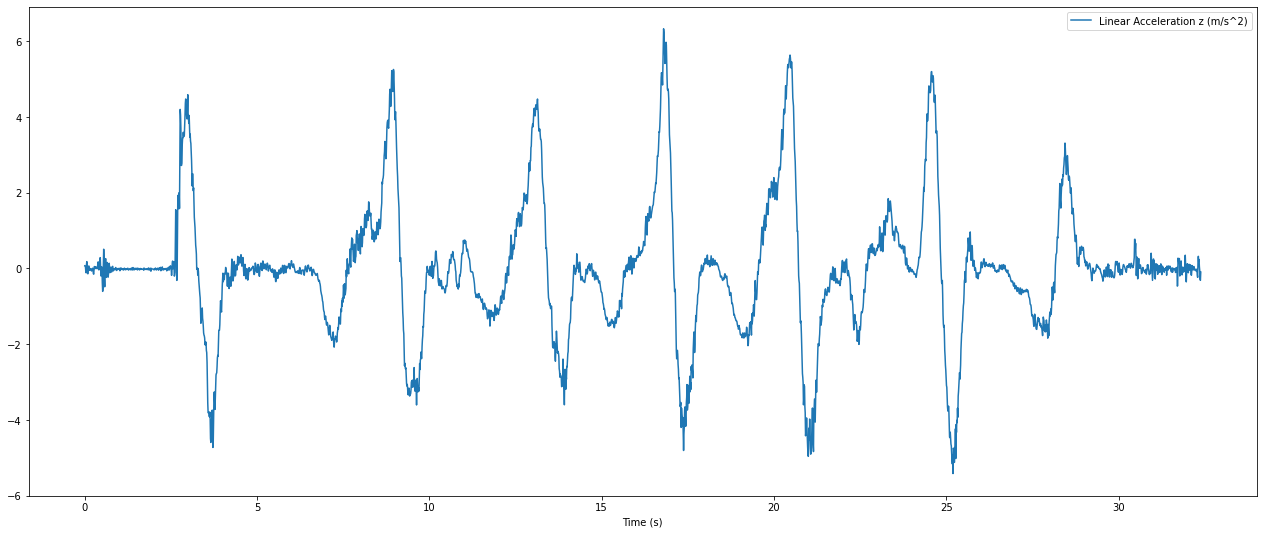

In [6]:
import pandas
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

df = pandas.read_csv('initial_testdata/Raw Data.csv')
df.plot.line(x="Time (s)", y="Linear Acceleration z (m/s^2)", figsize=(22, 9))

### Noise filtering, moving average

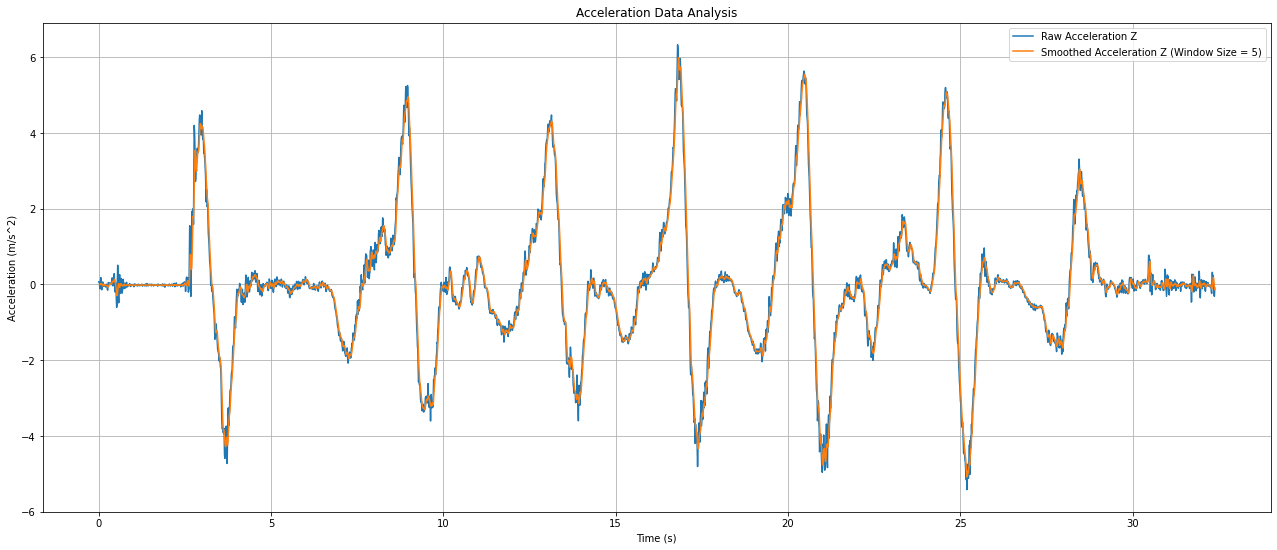

In [8]:
# Extract relevant columns for analysis
acceleration_z = df['Linear Acceleration z (m/s^2)']
time_1 = df['Time (s)']

# Apply a low-pass filter to smooth the acceleration data (example using a moving average)
window_size = 5
smoothed_acceleration_z = acceleration_z.rolling(window=window_size).mean()

# Plot the raw and smoothed acceleration data
plt.figure(figsize=(22, 9))
plt.plot(time_1, acceleration_z, label='Raw Acceleration Z')
plt.plot(time_1, smoothed_acceleration_z, label=f'Smoothed Acceleration Z (Window Size = {window_size})')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.title('Acceleration Data Analysis')
plt.legend()
plt.grid()
plt.show()

### Peak detection

In [12]:
import numpy as np

acceleration_z = df['Linear Acceleration z (m/s^2)']
time_1 = df['Time (s)']
window_size = 5
smoothed_acceleration_z = acceleration_z.rolling(window=window_size).mean()

peaks, _ = find_peaks(smoothed_acceleration_z, distance=100, height=0.1)  # Adjust parameters as needed
# Initialize lists to store metrics
peak_accelerations = []
time_to_peaks = []
total_ranges = []

# Iterate through detected peaks to segment and calculate metrics
for i in range(len(peaks) - 1):
  start_index = peaks[i]
  end_index = peaks[i + 1]

  # Extract relevant data for the segment
  segment_acceleration = smoothed_acceleration_z[start_index:end_index]
  segment_time = time_1[start_index:end_index]

  # Calculate metrics
  peak_acceleration = max(segment_acceleration)
  time_to_peak = segment_time[np.argmax(segment_acceleration)] - segment_time[start_index]
  total_range = max(segment_acceleration) - min(segment_acceleration)

  # Append metrics to lists
  peak_accelerations.append(peak_acceleration)
  time_to_peaks.append(time_to_peak)
  total_ranges.append(total_range)

# Convert lists to NumPy arrays
peak_accelerations = np.array(peak_accelerations)
time_to_peaks = np.array(time_to_peaks)
total_ranges = np.array(total_ranges)

# Print or further analyze the calculated metrics
print("Peak Accelerations:", peak_accelerations)
print("Time to Peaks:", time_to_peaks)
print("Total Ranges:", total_ranges)

KeyError: 0